In [3]:
import pandas as pd
from pathlib import Path
from dotenv import load_dotenv
load_dotenv()
import os
from contextlib import closing
from mysql.connector import connect
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Create Creditials for mysql connection

In [4]:
host="localhost"
user=os.getenv('USERNAME1')
password=os.getenv('PASSWORD1')
database= 'BigData'

### Read data from dummy datasets

In [5]:
with closing(connect(host=host, user=user, password=password, database=database)) as cnxn:
    mix = pd.read_sql_query('select * from Sentiment where User_id is not null limit 10000', cnxn)
    retweet = pd.read_sql_query('select * from Sentiment where User_id is not null and Original_tweet > 0 limit 10000', cnxn)
    original = pd.read_sql_query('select * from Sentiment where User_id is not null and Original_tweet = 0 limit 10000', cnxn)

In [6]:
mix.shape, mix.describe()

((10000, 13),
            Tweet_ID  Logits_Neutral  Logits_Positive  Logits_Negative  \
 count  1.000000e+04    10000.000000     10000.000000     10000.000000   
 mean   1.289351e+18        1.411272         0.246387         1.180189   
 std    8.515408e+11        0.607640         1.191285         1.186699   
 min    1.289350e+18        0.019662        -1.662872        -2.243702   
 25%    1.289351e+18        1.014373        -0.592888         0.249024   
 50%    1.289351e+18        1.385363        -0.020321         1.069624   
 75%    1.289352e+18        1.729442         0.829298         2.021499   
 max    1.289354e+18        4.572380         8.299328         5.530260   
 
        followers_count  Original_tweet       User_id  Retweet_count  
 count     1.000000e+04    1.000000e+04  1.000000e+04    9997.000000  
 mean      1.288980e+04    8.944570e+17  3.855799e+17    8504.168351  
 std       3.350535e+05    5.939753e+17  5.108286e+17   24560.273909  
 min       0.000000e+00    0.00000

In [7]:
original.describe()

,Tweet_ID,Logits_Neutral,Logits_Positive,Logits_Negative,followers_count,Original_tweet,User_id,Retweet_count
count,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.0,1.000000e+04,9996.000000
mean,1.289354e+18,1.194426,0.353781,1.242206,2.502656e+04,0.0,3.943771e+17,1.667267
std,2.554359e+12,0.602141,1.293683,1.251726,5.054064e+05,0.0,5.266144e+17,37.609855
min,1.289350e+18,0.010039,-1.662872,-2.918126,0.000000e+00,0.0,1.688000e+03,0.000000
25%,1.289352e+18,0.774631,-0.566244,0.278118,1.040000e+02,0.0,1.830589e+08,0.000000
50%,1.289354e+18,1.144936,0.063046,1.191861,4.740000e+02,0.0,2.160267e+09,0.000000
75%,1.289357e+18,1.546193,0.930422,2.122740,1.881250e+03,0.0,9.607912e+17,0.000000
max,1.289359e+18,4.230170,8.299328,5.162858,2.562632e+07,0.0,1.289355e+18,2915.000000


In [8]:
retweet.describe()

,Tweet_ID,Logits_Neutral,Logits_Positive,Logits_Negative,followers_count,Original_tweet,User_id,Retweet_count
count,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,9994.000000
mean,1.289352e+18,1.503748,0.173895,1.177265,2.641942e+03,1.288098e+18,3.828213e+17,11324.968581
std,1.142970e+12,0.583496,1.107095,1.133252,2.252854e+04,3.177698e+16,5.029245e+17,27111.018748
min,1.289350e+18,0.071763,-1.678091,-2.119230,0.000000e+00,1.000000e+00,1.538300e+04,1.000000
25%,1.289351e+18,1.138510,-0.620122,0.294329,1.290000e+02,1.289146e+18,3.092639e+08,53.000000
50%,1.289352e+18,1.421539,-0.082664,1.068381,4.040000e+02,1.289271e+18,2.492093e+09,682.000000
75%,1.289353e+18,1.796293,0.740199,2.020746,1.435000e+03,1.289338e+18,9.003647e+17,7558.000000
max,1.289354e+18,4.572380,7.620745,5.530260,1.786762e+06,1.289354e+18,1.289334e+18,242484.000000


In [9]:
mix.groupby(by=['Sentiment_Label'])['Retweet_count'].describe()

,count,mean,std,min,25%,50%,75%,max
Sentiment_Label,,,,,,,,
negative,4422.0,6650.722976,13936.995985,0.0,0.0,109.0,3465.0,128854.0
neutral,4205.0,12316.600951,34488.689465,0.0,1.0,93.0,3153.0,242484.0
positive,1370.0,2784.939416,5999.249507,0.0,0.0,8.0,2464.0,30379.0


In [10]:
original.groupby(by=['Sentiment_Label'])['Retweet_count'].describe()

,count,mean,std,min,25%,50%,75%,max
Sentiment_Label,,,,,,,,
negative,4989.0,2.253357,50.725403,0.0,0.0,0.0,0.0,2915.0
neutral,3265.0,1.203369,19.196489,0.0,0.0,0.0,0.0,974.0
positive,1742.0,0.858209,7.469101,0.0,0.0,0.0,0.0,222.0


In [11]:
retweet.groupby(by=['Sentiment_Label'])['Retweet_count'].describe()

,count,mean,std,min,25%,50%,75%,max
Sentiment_Label,,,,,,,,
negative,4217.0,9091.295708,15615.658346,1.0,88.0,751.0,20110.0,128854.0
neutral,4699.0,14817.149819,36138.082022,1.0,40.0,538.0,5302.0,242484.0
positive,1078.0,4840.403525,7324.678495,1.0,36.0,846.0,8116.0,30379.0


In [12]:
retweet.head()

,Tweet_ID,Sentiment_Label,Logits_Neutral,Logits_Positive,Logits_Negative,Created_at,location,followers_count,Original_tweet,User_id,Content,Retweet_count,Fetched
0,1289353890442272768,positive,0.888840,1.620757,0.525604,2020-08-01 00:14:57,,2295.0,1.289010e+18,8.104014e+07,I can’t wait till he recommends we all wear ea...,257.0,Yes
1,1289350127723794432,negative,1.411669,-1.258611,3.018710,2020-08-01 00:00:00,"South Bend, IN",78.0,1.289338e+18,1.247750e+09,Let’s not mince words on this one: Americans a...,23270.0,Yes
2,1289350127870599168,neutral,2.538646,-0.366083,0.846590,2020-08-01 00:00:00,,151.0,1.289192e+18,2.508485e+09,Congressional hearings on Covid open up with C...,8425.0,Yes
3,1289350127879036931,negative,0.814333,-0.118949,2.254941,2020-08-01 00:00:00,"Arkansas, USA and Namibia",121.0,1.289265e+18,1.830628e+08,The fake news media doesn't want you to see th...,31060.0,Yes
4,1289350127988047873,negative,1.188399,-0.534379,1.751747,2020-08-01 00:00:00,"Washington, DC",484.0,1.289050e+18,6.572556e+07,I cry as an epidemiologist for Herman Cain—bec...,1605.0,Yes


<AxesSubplot:xlabel='Retweet_count', ylabel='Logits_Neutral'>

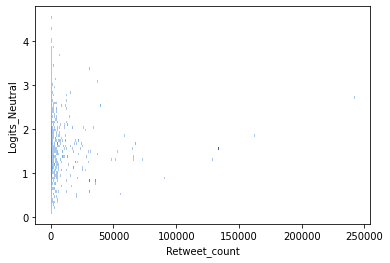

In [15]:
sns.histplot(data=retweet, x="Retweet_count", y="Logits_Neutral")


<AxesSubplot:xlabel='Retweet_count', ylabel='Logits_Negative'>

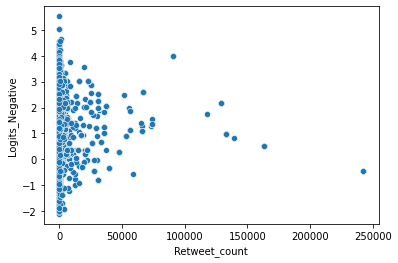

In [19]:
sns.scatterplot(data=retweet, x="Retweet_count", y="Logits_Negative")

<AxesSubplot:xlabel='Sentiment_Label', ylabel='Retweet_count'>

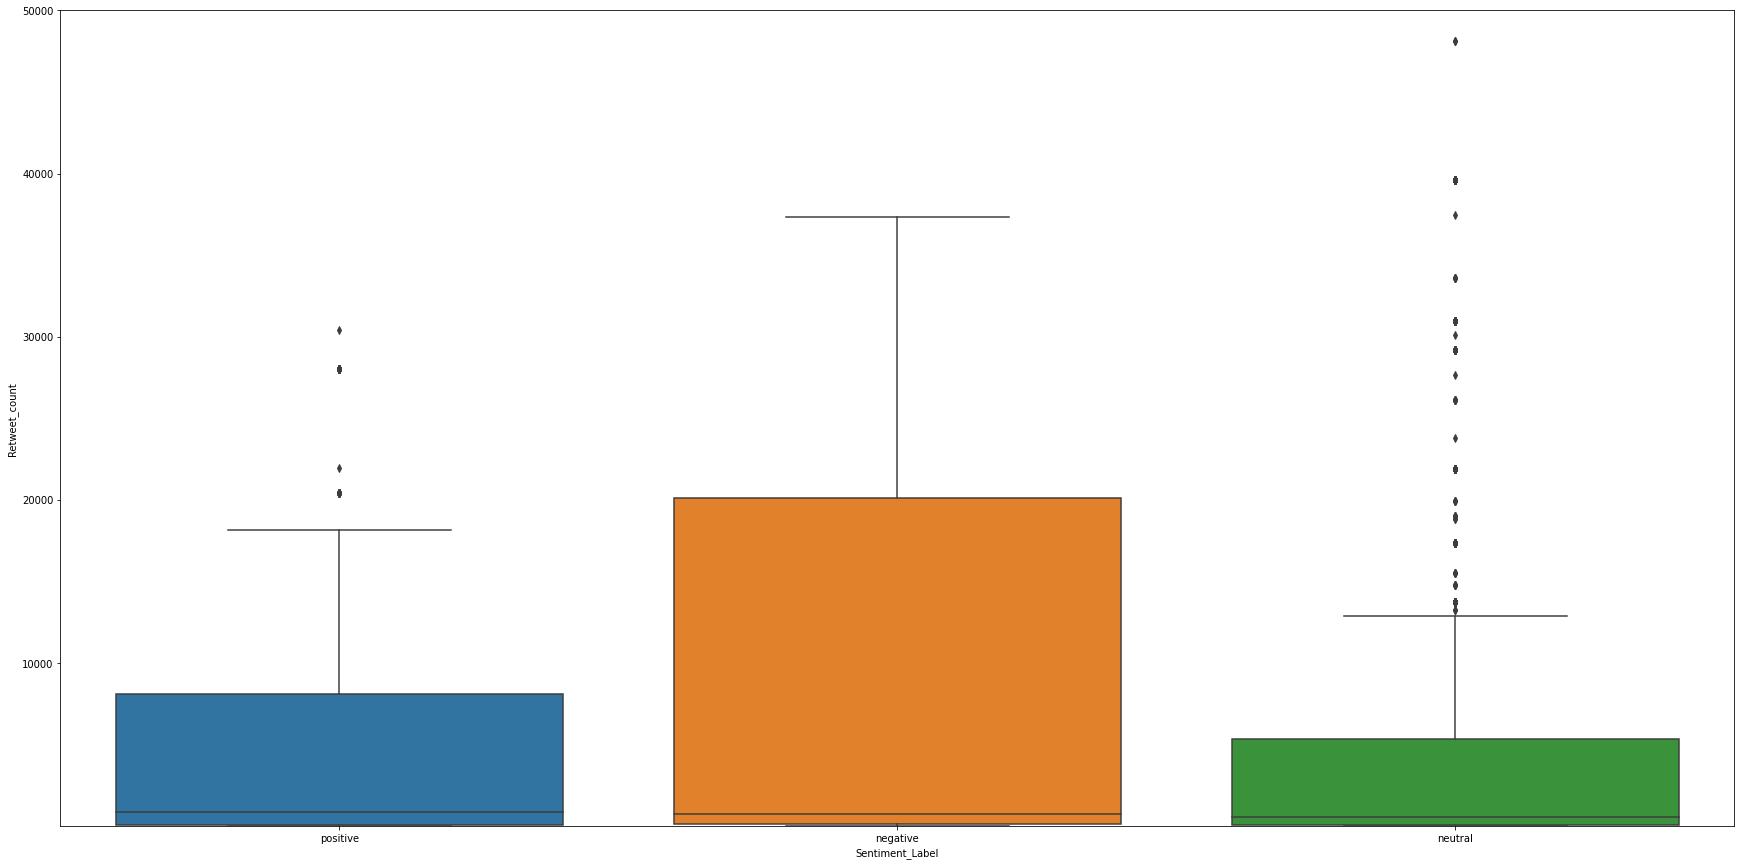

In [35]:
fig, axes = plt.subplots(figsize=(30,15))
plt.ylim(1, 50000)
sns.boxplot(data=retweet, x="Sentiment_Label", y="Retweet_count", ax =axes)

### If we only consider tweets that will not be trending

<AxesSubplot:xlabel='Sentiment_Label', ylabel='Retweet_count'>

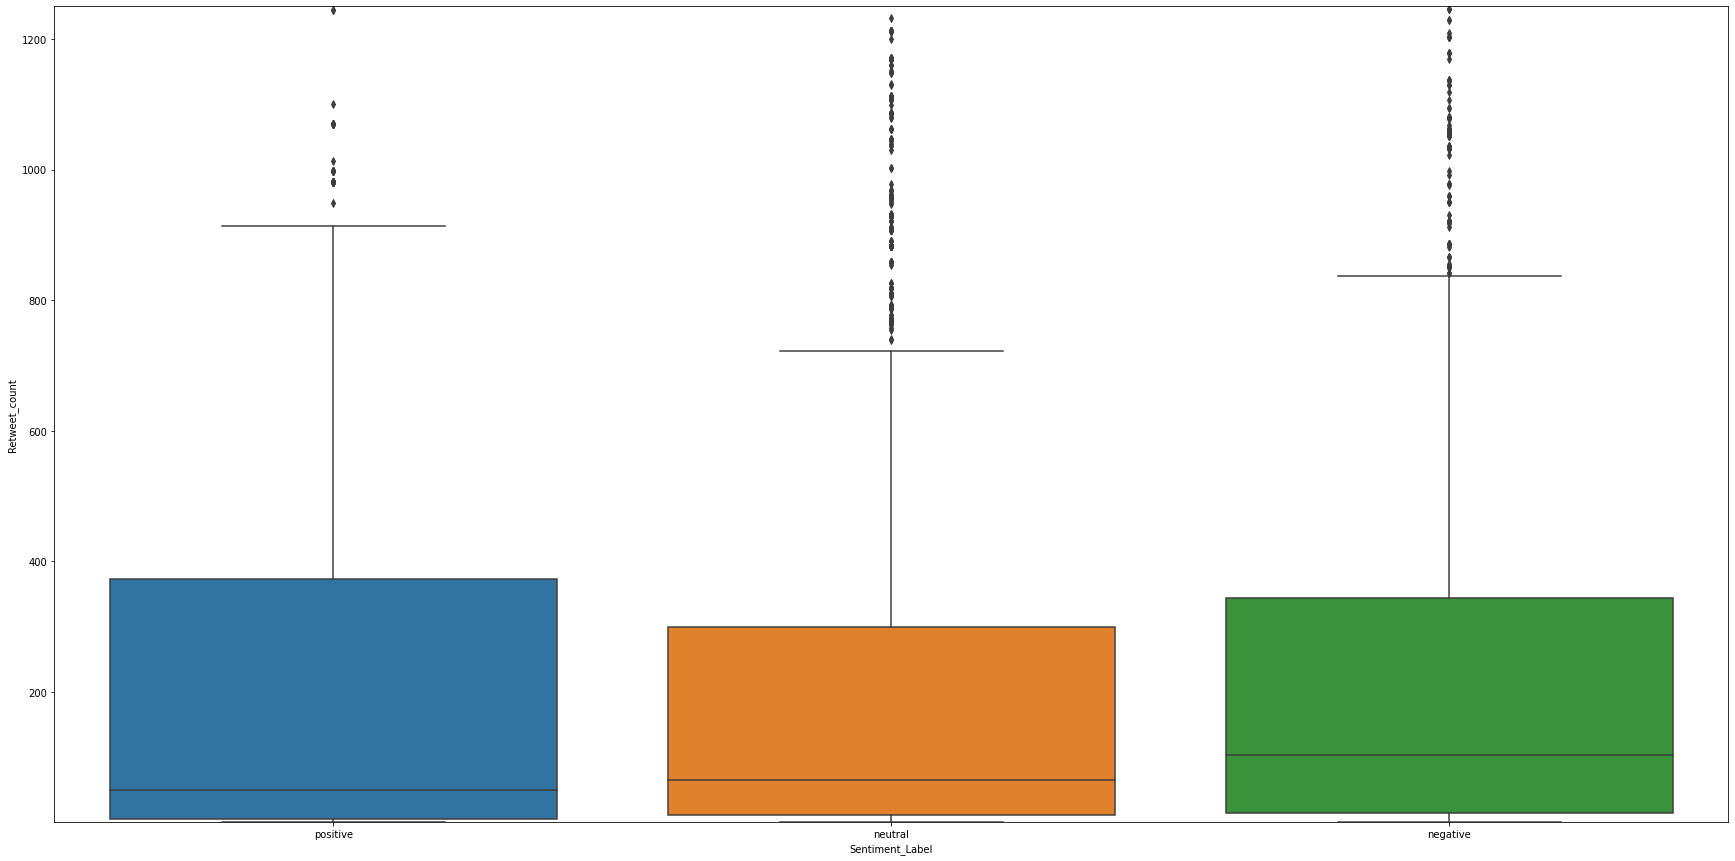

In [40]:
fig, axes = plt.subplots(figsize=(30,15))
plt.ylim(1, 1250)
sns.boxplot(data=retweet.loc[retweet['Retweet_count'] < 1250], x ="Sentiment_Label", y="Retweet_count", ax =axes)